# Задачи по Random Forest

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
data_mush = pd.read_csv('data/training_mush.csv')
data_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [3]:
X_train = data_mush.drop('class', axis=1)
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0


In [4]:
y_train = data_mush['class']
y_train.head()

0    0
1    1
2    1
3    0
4    0
Name: class, dtype: int64

## ЗАДАЧА

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. 
Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)
Параметры для выбора -

* n_estimators: от 10 до 50 с шагом 10
* max_depth: от 1 до 12 с шагом 2
* min_samples_leaf: от 1 до 7
* min_samples_split: от 2 до 9 с шагом 2

In [5]:
clf_mush = RandomForestClassifier(random_state=0)
parameters = {'n_estimators': range(10, 60, 10), 
              'max_depth': range(1, 13, 2), 
              'min_samples_leaf': range(1, 8),
              'min_samples_split': range(2, 10, 2)}
grid_search_cv_clf = GridSearchCV(clf_mush, parameters, cv=3)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

## ЗАДАЧА

Выберите правильные утверждения о важности фичей для нашего классификатора

In [6]:
best_clf = grid_search_cv_clf.best_estimator_

In [7]:
feature_importance_df = pd.DataFrame({'feature': list(X_train),
                                       'feature_importance': best_clf.feature_importances_})
feature_importance_df.sort_values('feature_importance', ascending=False)

,feature,feature_importance
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


## ЗАДАЧА

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! 
Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

In [8]:
test_data = pd.read_csv('data/testing_mush.csv')
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [9]:
predictions = best_clf.predict(test_data)
predictions.sum()

976

## ЗАДАЧА

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, 
(воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

In [10]:
y_test = pd.read_csv('data/testing_y_mush.csv')
y_test.head()

,class
0,0
1,0
2,1
3,1
4,1


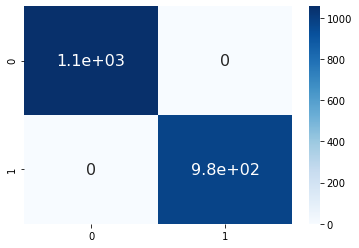

In [11]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size": 16}, cmap="Blues")

## ЗАДАЧА

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. 
Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, 
вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, 
чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел 
число крейсеров, транспортников и истребителей.

In [12]:
train_data = pd.read_csv('data/invasion.csv')
train_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [13]:
X_train = train_data.drop('class', axis=1)
X_train.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [14]:
y_train = train_data['class']
y_train.head()

0    transport
1    transport
2    transport
3      fighter
4      fighter
Name: class, dtype: object

In [15]:
clf = RandomForestClassifier()
parameters = {'n_estimators': range(10, 60, 10), 
              'max_depth': range(1, 16)}
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [16]:
test_data = pd.read_csv('data/operative_information.csv')

best_clf = grid_search_cv_clf.best_estimator_
predictions = best_clf.predict(test_data)

In [17]:
pd.Series(predictions).value_counts()

fighter      675
transport    596
cruiser      229
dtype: int64

## ЗАДАЧА

Какая переменная оказалась самой важной для классифицирования кораблей?

In [18]:
feature_importance_df = pd.DataFrame({'feature': list(X_train),
                                      'feature_importance': best_clf.feature_importances_})
feature_importance_df.sort_values('feature_importance', ascending=False)

,feature,feature_importance
3,brightness,0.490390
5,volume,0.168236
0,g_reflection,0.144494
2,speed,0.129956
1,i_reflection,0.066924
4,time_of_observance,0.000000


## ЗАДАЧА

Проанализируйте имеющиеся данные об опасности разных регионов космоса и 
укажите наиболее вероятные причины угрозы

In [19]:
train_data = pd.read_csv('data/space_can_be_a_dangerous_place.csv')
train_data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [20]:
X_train = train_data.drop('dangerous', axis=1)
X_train.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo
0,169.1,138.0,22.3212,0.706285,0,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1


In [21]:
y_train = train_data['dangerous']
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: dangerous, dtype: int64

In [23]:
clf = RandomForestClassifier()
parameters = {'n_estimators': range(10, 60, 10), 
              'max_depth': range(1, 16)}
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [24]:
best_clf = grid_search_cv_clf.best_estimator_

In [25]:
feature_importance_df = pd.DataFrame({'feature': list(X_train),
                                      'feature_importance': best_clf.feature_importances_})
feature_importance_df.sort_values('feature_importance', ascending=False)


,feature,feature_importance
5,buggers_were_noticed,0.545820
6,nearby_system_has_planemo,0.400773
4,black_hole_is_near,0.016892
3,dustiness,0.011864
0,r,0.008875
2,peradventure_index,0.008066
1,phi,0.007709
